# Brandon Francisco Flores

# Problema 1:

Los siguientes datos

In [10]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

Estimación de a: 1.438 con intervalo de confianza: (1.2757408184418642, 1.6000215731929217)
Estimación de b: 2.181 con intervalo de confianza: (1.8763138512027078, 2.4861440314112873)


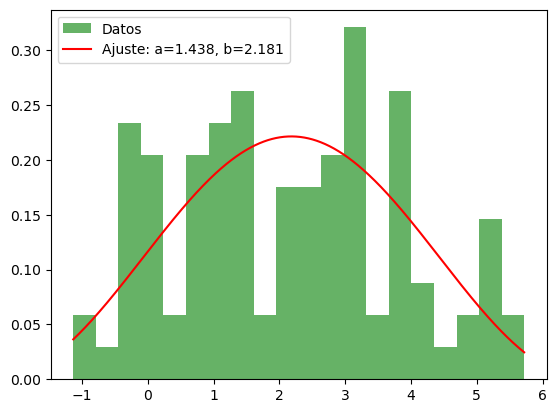

In [14]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

# Función de densidad de probabilidad (PDF) para la distribución coseno
def coseno_pdf(x, a, b):
    return (1 / (2 * np.pi * a)) * (1 + np.cos((x - b) / a))

# Función de verosimilitud negativa para maximizar (ajustar parámetros)
def neg_log_likelihood(params, x):
    a, b = params
    # Asegurarse de que la PDF está correctamente definida
    pdf_values = coseno_pdf(x, a, b)
    # Añadir una pequeña constante para evitar problemas con log(0)
    return -np.sum(np.log(pdf_values + 1e-10))

# Estimaciones iniciales basadas en los datos
initial_b = np.mean(x)  # Estimación inicial para b (localización)
initial_a = np.std(x)  # Estimación inicial para a (escala)

initial_guess = [initial_a, initial_b]

# Ajuste de los parámetros usando un optimizador no lineal (BFGS)
result = opt.minimize(neg_log_likelihood, initial_guess, args=(x,), method='BFGS')

# Parámetros estimados
a_est, b_est = result.x

# Estimación de la matriz de covarianza (calculada desde el Hessiano)
cov_matrix = result.hess_inv  # Esto es la inversa de la matriz Hessiana
errors = np.sqrt(np.diag(cov_matrix))  # Errores estándar

# Intervalos de confianza del 95%
conf_int_a = (a_est - 1.96 * errors[0], a_est + 1.96 * errors[0])
conf_int_b = (b_est - 1.96 * errors[1], b_est + 1.96 * errors[1])

# Resultados
print(f"Estimación de a: {a_est:.3f} con intervalo de confianza: {conf_int_a}")
print(f"Estimación de b: {b_est:.3f} con intervalo de confianza: {conf_int_b}")

# Graficar los datos y la distribución ajustada
x_vals = np.linspace(min(x), max(x), 1000)
y_vals = coseno_pdf(x_vals, a_est, b_est)

plt.hist(x, bins=20, density=True, alpha=0.6, color='g', label='Datos')
plt.plot(x_vals, y_vals, label=f'Ajuste: a={a_est:.3f}, b={b_est:.3f}', color='r')
plt.legend()
plt.show()

# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%. 

In [6]:
# Estimación del primer momento (promedio de la muestra)
mu_hat = np.mean(x)

# Estimación de la desviación estándar muestral
sigma_hat = np.std(x, ddof=1)

# Tamaño de la muestra
n = len(x)

# Error estándar de la media
se_mu = sigma_hat / np.sqrt(n)

# Intervalo de confianza del 95% usando la distribución t de Student
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, df=n-1)

# Intervalo de confianza del 95% para la media
ci_lower = mu_hat - t_value * se_mu
ci_upper = mu_hat + t_value * se_mu

# Resultados
print(f"Estimación de la media (mu): {mu_hat:.3f}")
print(f"Intervalo de confianza del 95%: ({ci_lower:.3f}, {ci_upper:.3f})")

Estimación de la media (mu): 2.134
Intervalo de confianza del 95%: (1.795, 2.473)


# Problema 3:
Un fabricante farmacéutico compra materias primas de dos proveedores diferentes. El nivel medio de impurezas es aproximadamente el mismo para ambos proveedores, pero el fabricante está preocupado por la variabilidad en la cantidad de impurezas de entre un embarque y otro. Si el nivel de impurezas tiende a variar en forma excesiva de una fuente de abastecimiento, esto podría afectar la calidad del producto final. Para comparar la variación en el porcentaje de impurezas para los dos proveedores, el fabricante selecciona diez envíos de cada uno de ellos y mide el porcentaje de impurezas de cada envío. Las varianzas muestrales fueron s2 1 = .273 y s2 2 = .094 respectivamente. Forme un intervalo de confianza de 95% para la relación entre las varianzas poblacionales reales.

In [7]:
# Datos
s1_squared = 0.273  # varianza de la primera muestra
s2_squared = 0.094  # varianza de la segunda muestra
n1 = 10  # tamaño de la primera muestra
n2 = 10  # tamaño de la segunda muestra
alpha = 0.05  # nivel de significancia para el 95% de confianza

# Razón de varianzas
F = s1_squared / s2_squared

# Grados de libertad para ambas muestras
df1 = n1 - 1
df2 = n2 - 1

# Valores críticos de la distribución F
F_lower = stats.f.ppf(1 - alpha/2, df1, df2)  # F en el límite inferior
F_upper = stats.f.ppf(alpha/2, df1, df2)  # F en el límite superior

# Intervalo de confianza para la razón de varianzas
CI_lower = F / F_upper
CI_upper = F / F_lower

# Resultados
print(f"Razón de varianzas (F): {F:.3f}")
print(f"Intervalo de confianza del 95% para la relación de varianzas: ({CI_lower:.3f}, {CI_upper:.3f})")

Razón de varianzas (F): 2.904
Intervalo de confianza del 95% para la relación de varianzas: (11.693, 0.721)


# Problema 4:
Una encuesta a 415 ejecutivos corporativos, de gobierno y contadores de la Financial Accounting Foundation encontró que 278 consideraban el flujo de caja (lo contrario de ganancias por acción, etc.) como el indicador más importante de la salud financiera de una compañía. Suponga que estos 415 ejecutivos constituyen una muestra aleatoria de la población de todos los ejecutivos. Use los datos para hallar un intervalo de confianza de 95% para la fracción de todos los ejecutivos corporativos que consideran que el flujo de caja es la medida más importante de la salud financiera de una compañía.

In [8]:
import math

# Datos proporcionados
n = 415  # Tamaño de la muestra
x = 278  # Número de éxitos (ejecutivos que consideran el flujo de caja más importante)

# Proporción muestral
p_hat = x / n

# Valor crítico Z para un intervalo de confianza del 95%
z_alpha = stats.norm.ppf(1 - 0.05 / 2)  # 95% de confianza, Z_alpha/2

# Desviación estándar de la proporción
std_error = math.sqrt(p_hat * (1 - p_hat) / n)

# Margen de error
margin_of_error = z_alpha * std_error

# Intervalo de confianza
ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

# Resultados
print(f"Proporción muestral (p̂): {p_hat:.4f}")
print(f"Intervalo de confianza del 95% para la proporción: ({ci_lower:.4f}, {ci_upper:.4f})")

Proporción muestral (p̂): 0.6699
Intervalo de confianza del 95% para la proporción: (0.6246, 0.7151)


# Problema 5:
Se sabe que la probabilidad p de obtener una cara al lanzar al aire una moneda desbalanceada es 1/ 4 o 3/ 4. La moneda es lanzada dos veces al aire y se observa un valor para Y, el número de caras. Para cada valor posible de Y, ¿cuál de los dos valores para p (1/ 4 o 3/ 4) maximiza la probabilidad de que Y = y? Dependiendo del valor de y observado realmente, En otras palabras ¿cuál es el MLE de p?

$\textbf{Solución.}$ Sabemos que $Y$, el número de caras en dos lanzamientos de la moneda, sigue una distribución binomial $Y∼\text{Binomial}(n=2,p)$. La función de masa de probabilidad para la distribución binomial es:
$$P(Y=y|p)=\binom{2}{y} p^y (1-p)^{2-y}.$$
Dado que estamos lanzando la moneda dos veces, los posibles valores para $Y$ (el número de caras) son $y=0,1,2$. Analizamos la probabilidad para cada uno de estos valores de $y$ con los dos valores posibles de $p$.

Para $Y=0:$
$$P(Y=0|p)=\binom{2}{0} p^0 (1-p)^2=(1-p)^2.$$
1. Para $p=\frac{1}{4}$, $P(Y=0|p=\frac{1}{4})=(1-\frac{1}{4})^2=\frac{9}{16}.$
2. Para $p=\frac{3}{4}$, $P(Y=0|p=\frac{3}{4})=(1-\frac{3}{4})^2=\frac{1}{16}$.

Para $Y=1:$
$$P(Y=1|p)=\binom{2}{1} p^1 (1-p)^1=2p(1-p).$$
1. Para $p=\frac{1}{4}$, $P(Y=1|p=\frac{1}{4})=2 \left(\frac{1}{4}\right) \frac{3}{4}=\frac{6}{16}.$
2. Para $p=\frac{3}{4}$, $P(Y=1|p=\frac{3}{4})=2 \left(\frac{3}{4}\right) \frac{1}{4}=\frac{3}{16}$.

Para $Y=2:$
$$P(Y=2|p)=\binom{2}{2} p^2 (1-p)^0=p^2.$$
1. Para $p=\frac{1}{4}$, $P(Y=2|p=\frac{1}{4})=\left(\frac{1}{4}\right)^2=\frac{1}{16}.$
2. Para $p=\frac{3}{4}$, $P(Y=2|p=\frac{3}{4})=\left(\frac{3}{4}\right)^2=\frac{9}{16}.$

El $\hat{p}_{EMV}$ depende del valor observado $Y$:
1. Si $Y=0$, $\hat{p}_{EMV}=\frac{1}{4}$.
2. Si $Y=1$, ambos $p=\frac{1}{4}$ y $p=\frac{3}{4}$ son igualmente probables.
3. Si $Y=2$, $\hat{p}_{EMV}=\frac{3}{4}$.

# Problema 6:
Un examen de lectura se aplica a alumnos de sexto año en tres grandes escuelas primarias. Se considera que las calificaciones del examen en cada escuela tienen distribuciones normales con medias desconocidas $\mu_1, \mu_2, \mu_3$, respectivamente, y varianza común desconocida $\sigma^2(\sigma²_1 = \sigma²_2 = \sigma^2_3 = \sigma^2)$. Usando los datos de la tabla siguiente en muestras aleatorias independientes de cada escuela, pruebe si existe evidencia de una diferencia entre m1 y m2. Use a = .05.

Escuela I : $n_{1} = 10, \sum x_{i}^{2} = 36950 , \bar{x}= 60$
Escuela II : $n_{2} = 10, \sum y_{i}^{2} = 25850 , \bar{y}= 50$
Escuela III : $n_{3} = 10, \sum w_{i}^{2} = 49900 , \bar{x}= 70$


In [9]:
# Datos 
n1 = 10  # Número de alumnos en la escuela I
n2 = 10  # Número de alumnos en la escuela II

# Medias muestrales
x_bar = 60  # Media de la escuela I
y_bar = 50  # Media de la escuela II

# Sumas de los cuadrados de las observaciones
sum_x2 = 36950  # Suma de los cuadrados para la escuela I
sum_y2 = 25850  # Suma de los cuadrados para la escuela II

# Calcular las varianzas muestrales
sum_x = x_bar * n1  # Suma de las observaciones en la escuela I
sum_y = y_bar * n2  # Suma de las observaciones en la escuela II

S1_squared = (sum_x2 - (sum_x ** 2) / n1) / (n1 - 1)
S2_squared = (sum_y2 - (sum_y ** 2) / n2) / (n2 - 1)

# Estimación de la varianza común (S_p^2)
Sp_squared = ((n1 - 1) * S1_squared + (n2 - 1) * S2_squared) / (n1 + n2 - 2)

# Calcular el estadístico t
t_statistic = (x_bar - y_bar) / np.sqrt(Sp_squared * (1 / n1 + 1 / n2))

# Calcular los grados de libertad
df = n1 + n2 - 2

# Nivel de significancia
alpha = 0.05

# Valor crítico t para un intervalo de dos colas
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Imprimir resultados
print("Estadístico t calculado: ", t_statistic)
print("Valor crítico t para alfa =", alpha, "y grados de libertad =", df, "es: ", t_critical)

# Decisión sobre la hipótesis
if abs(t_statistic) > t_critical:
    print("Se rechaza la hipótesis nula. Hay suficiente evidencia para concluir que las medias son diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que las medias son diferentes.")


Estadístico t calculado:  2.23606797749979
Valor crítico t para alfa = 0.05 y grados de libertad = 18 es:  2.10092204024096
Se rechaza la hipótesis nula. Hay suficiente evidencia para concluir que las medias son diferentes.


# Problema 7:
¿Qué eficiencia de combustión debe esperar el propietario de una casa de un horno de petróleo? La EPA indica que 80% o más es excelente, 75% a 79% es buena, 70% a 74% es regular y debajo de 70% es mala. Un contratista de sistemas de calefacción doméstica, que vende dos marcas de calentadores de petróleo (llamémosles A y B) decidió comparar sus eficiencias medias al analizar las eficiencias de 8 calentadores del tipo A y 6 del tipo B. Los porcentajes de eficiencia resultantes para los 14 calentadores se muestran en la tabla siguiente.

Tipo A 72 78 73 69 75 74 69 75

Tipo B 78 76 81 74 82 75

a ¿Los datos proporcionan suficiente evidencia para indicar una diferencia en las eficiencias medias para las dos marcas de calentadores domésticos? Encuentre el valor p aproximado para la prueba e interprete su valor. 

b Determine un intervalo de confianza de 90% para (mA − mB) e interprete el resultado.

In [10]:
# Datos de las eficiencias de los calentadores
marca_A = np.array([72, 78, 73, 69, 75, 74, 69, 75])
marca_B = np.array([78, 76, 81, 74, 82, 75])

# Calcular las estadísticas para la marca A y B
n_A = len(marca_A)
n_B = len(marca_B)

mean_A = np.mean(marca_A)
mean_B = np.mean(marca_B)

var_A = np.var(marca_A, ddof=1)  # Varianza muestral de A
var_B = np.var(marca_B, ddof=1)  # Varianza muestral de B

# Estadístico t para varianzas desiguales (test de Welch)
t_statistic = (mean_A - mean_B) / np.sqrt(var_A / n_A + var_B / n_B)

# Calcular los grados de libertad ajustados usando la fórmula de Welch-Satterthwaite
df = (var_A / n_A + var_B / n_B) ** 2 / ((var_A / n_A) ** 2 / (n_A - 1) + (var_B / n_B) ** 2 / (n_B - 1))

# Calcular el valor p de la distribución t
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

# Imprimir resultados
print(f"Estadístico t: {t_statistic:.4f}")
print(f"Grados de libertad: {df:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisión sobre la hipótesis
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe evidencia de que las medias son diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que las medias son diferentes.")


Estadístico t: -2.6345
Grados de libertad: 10.5675
Valor p: 0.0239
Rechazamos la hipótesis nula. Existe evidencia de que las medias son diferentes.


In [11]:
# Nivel de confianza y valor crítico t
alpha = 0.10
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Error estándar de la diferencia de medias
se_diff = np.sqrt(var_A / n_A + var_B / n_B)

# Intervalo de confianza
confidence_interval = (mean_A - mean_B) + np.array([-1, 1]) * t_critical * se_diff

print(f"Intervalo de confianza del 90% para (mu_A - mu_B): {confidence_interval}")


Intervalo de confianza del 90% para (mu_A - mu_B): [-7.64930257 -1.43403076]


# Problema 8: 
Los datos de la siguiente tabla muestran lecturas en pies-libras de la resistencia al impacto de dos clases de material de empaque, tipo A y tipo B. Determine si la información sugiere una diferencia en la resistencia media entre las dos clases de material. Realice la prueba con un nivel de significancia a = .10.

A     &nbsp; B \
1.25 &nbsp; .89 \
1.16 &nbsp; 1.01 \
1.33 &nbsp; .97 \
1.15 &nbsp; .95 \
1.23 &nbsp; .94 \
1.20 &nbsp; 1.02 \
1.32 &nbsp; .98 \
1.28 &nbsp; 1.06 \
1.21 &nbsp; .98


$\textbf{Solución.}$ Para determinar si hay una diferencia significativa en la resistencia media entre los dos tipos de material de empaque (A y B), se puede realizar una prueba t para muestras independientes.

In [1]:
import scipy.stats as stats

# Datos de la tabla
data_A = [1.25, 1.16, 1.33, 1.15, 1.23, 1.20, 1.32, 1.28, 1.21]
data_B = [0.89, 1.01, 0.97, 0.95, 0.94, 1.02, 0.98, 1.06, 0.98]

# Nivel de significancia
alpha = 0.10

# Realizar la prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(data_A, data_B)

# Mostrar los resultados
print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

# Determinar si rechazamos o no la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en la resistencia media entre los dos tipos de material.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en la resistencia media entre los dos tipos de material.")


Estadístico t: 9.5641
Valor p: 0.0000
Rechazamos la hipótesis nula: hay una diferencia significativa en la resistencia media entre los dos tipos de material.


# Problema 9:
Los datos de la siguiente tabla proporcionan las millas por galón recorridas por un automóvil de prueba cuando utiliza gasolinas de niveles variables de octanaje.

Millas por galón (y) &nbsp; Octano (x) \
13.0 &nbsp;89 \
13.2 &nbsp;93 \
13.0 &nbsp;87 \
 13.6 &nbsp;90 \
13.3 &nbsp;89 \
 13.8 &nbsp;95  \
 14.1 &nbsp;100 \
 14.0 &nbsp;98

 a Calcule el valor de r. 
 
 b ¿Los datos dan suficiente evidencia para indicar que el nivel de octanaje y las millas por galón son dependientes? Obtenga el nivel de significancia alcanzado, e indique su conclusión si desea realizar una prueba en el nivel de a = .05.

(b) $\textbf{Solución.}$ La prueba de hipótesis es
$$H_0:r=0\ \text{vs}\ H_1:r \neq 0.$$
El estadístico t se calcula con la siguiente fórmula:
$$t= \frac{r \sqrt{n-2}}{\sqrt{1-r^2}} \sim \mathcal{t}_{(n-2)}.$$

In [2]:
import numpy as np
from scipy.stats import pearsonr

# Datos de la tabla
x = np.array([89, 93, 87, 90, 89, 95, 100, 98])  # Octano
y = np.array([13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0])  # Millas por galón

# a) Calcular el coeficiente de correlación r
r, p_value = pearsonr(x, y)
print(f"Coeficiente de correlación r: {r:.4f}")
print(f"Valor p: {p_value:.4f}")

# b) Hipótesis de correlación
# Nivel de significancia
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay suficiente evidencia para indicar que el octanaje y las millas por galón están correlacionados.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para indicar que el octanaje y las millas por galón están correlacionados.")


Coeficiente de correlación r: 0.8914
Valor p: 0.0029
Se rechaza la hipótesis nula. Hay suficiente evidencia para indicar que el octanaje y las millas por galón están correlacionados.


# Problema 10:
Se realizó un experimento para determinar el efecto de presión y temperatura en el rendimiento de una sustancia química. Se emplearon dos niveles de presión (en libras por pulgada cuadrada, psi) y tres de temperatura:

Presión: 50 , 80
Temperatura (F) : 100, 200, 300

Una prueba del experimento en cada combinación de temperatura-presión dio como resultado los datos que aparecen en la siguiente tabla.

Rendimiento &nbsp; Presión &nbsp; Temperatura\
21 &nbsp;50&nbsp; 100 \
23 &nbsp;50 &nbsp;200 \
26 &nbsp;50 &nbsp;300 \
22 &nbsp;80 &nbsp;100 \
23 &nbsp;80 &nbsp;200 \
28 &nbsp;80&nbsp; 300

a Ajuste el modelo $Y = \beta_{0} +\beta_1x_1 +\beta_2x_2 +\beta_3x_2^{2} + \epsilon$, donde $x_1$ = presión y $x_2$ = temperatura. 

b Compruebe si $\beta_3$ difiere considerablemente de cero, con $\alpha$ = .05. 

c Pruebe la hipótesis de que la temperatura no afecta el rendimiento, con $\alpha$ = .05.

In [3]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Datos del experimento
presion = np.array([50, 50, 50, 80, 80, 80])  # Presión (x1)
temperatura = np.array([100, 200, 300, 100, 200, 300])  # Temperatura (x2)
rendimiento = np.array([21, 23, 26, 22, 23, 28])  # Rendimiento (Y)

# Crear las variables para el modelo (incluir x2^2)
x1 = presion
x2 = temperatura
x2_squared = x2**2

# Construir el diseño de la matriz X (con intercepto)
X = np.column_stack((np.ones(len(x1)), x1, x2, x2_squared))  # Intercepto, x1, x2, x2^2

# Ajustar el modelo de regresión
model = sm.OLS(rendimiento, X)
results = model.fit()

# Imprimir los resultados del modelo
print(results.summary())

# b) Comprobar si β3 (coeficiente de x2^2) es diferente de cero
# Comprobamos el p-valor para β3 (término cuadrático de temperatura)
beta_3_p_value = results.pvalues[3]  # p-valor de β3 (x2^2)
print(f"P-valor para β3 (temperatura cuadrática): {beta_3_p_value:.4f}")

# c) Comprobar si β2 (coeficiente de x2) es diferente de cero
# Comprobamos el p-valor para β2 (temperatura)
beta_2_p_value = results.pvalues[2]  # p-valor de β2 (x2)
print(f"P-valor para β2 (temperatura): {beta_2_p_value:.4f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     22.56
Date:                Mon, 18 Nov 2024   Prob (F-statistic):             0.0428
Time:                        13:15:47   Log-Likelihood:                -3.1384
No. Observations:                   6   AIC:                             14.28
Df Residuals:                       2   BIC:                             13.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3333      2.513      8.091      0.0

C:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Para $\beta_3$, dado que el $p-value$ es mayor que 0.05, no rechazamos la hipótesis nula de que $\beta_3=0$, lo que indica que la temperatura cuadrática no tiene un efecto significativo en el rendimiento.

Para $\beta_2$, también no rechazamos la hipótesis nula, indicando que la temperatura no tiene un efecto significativo en el rendimiento.

# Problema 11:
Los datos de la siguiente tabla provienen de la comparación de los porcentajes de crecimiento para bacterias tipos A y B. El crecimiento Y registrado en cinco puntos igualmente espaciados (y codificados) de tiempo se muestra en la tabla.

Tiempo codificado : -2, -1, 0 , 1, 2 \
Bacteria A : 8.0, 9.0, 9.1 , 10.2, 10.4\
Bacteria B : 10.0, 10.3, 12.2, 12.6, 13.9

a Ajuste el modelo lineal $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$ a los n = 10 puntos. Sea $x_1$ = 1 si el punto se refiere a bacterias tipo B y sea $x_1$ = 0 si el punto se refiere al tipo A. Sea $x_2$ = tiempo codificado. 

b Grafique los puntos y las dos rectas de crecimiento. Observe que b3 es la diferencia entre las pendientes de las dos rectas y representa la interacción tiempo-bacteria. 

c Prediga el crecimiento del tipo A en el tiempo $x_2$ = 0 y compare la respuesta con la gráfica. Repita el proceso para el tipo B.

d ¿Los datos presentan suficiente evidencia para indicar una diferencia en los porcentajes de crecimiento para los dos tipos de bacteria?

In [4]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Datos
tiempo = np.array([-2, -1, 0, 1, 2])  # Tiempo codificado (x2)
bacteria_A = np.array([8.0, 9.0, 9.1, 10.2, 10.4])  # Crecimiento Bacteria A
bacteria_B = np.array([10.0, 10.3, 12.2, 12.6, 13.9])  # Crecimiento Bacteria B

# Variables indicadoras y tiempos
x1_A = np.zeros(len(tiempo))  # x1 = 0 para Bacteria A
x1_B = np.ones(len(tiempo))  # x1 = 1 para Bacteria B

# Matrices de diseño para las bacterias A y B
x2_A = tiempo
x2_B = tiempo
x1x2_A = x1_A * x2_A
x1x2_B = x1_B * x2_B

# Combinamos las dos bacterias en un solo arreglo para realizar el ajuste
x1 = np.concatenate([x1_A, x1_B])
x2 = np.concatenate([x2_A, x2_B])
x1x2 = np.concatenate([x1x2_A, x1x2_B])
Y = np.concatenate([bacteria_A, bacteria_B])

# Crear la matriz de diseño X
X = np.column_stack((np.ones(len(x1)), x1, x2, x1x2))

# Ajustar el modelo de regresión
model = sm.OLS(Y, X)
results = model.fit()

# Mostrar el resumen del modelo
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     79.15
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           3.24e-05
Time:                        14:32:05   Log-Likelihood:                -1.1098
No. Observations:                  10   AIC:                             10.22
Df Residuals:                       6   BIC:                             11.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3400      0.156     59.834      0.0

C:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


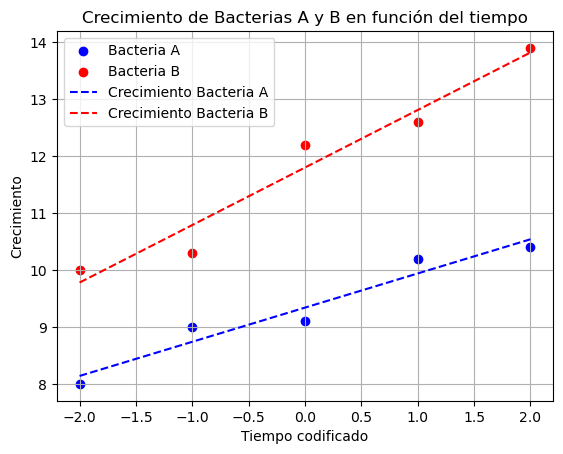

In [5]:
# Coeficientes estimados
beta_0, beta_1, beta_2, beta_3 = results.params

# Crear los puntos de tiempo para graficar
tiempo_grafica = np.linspace(-2, 2, 100)

# Crecimiento para Bacteria A y B en el rango de tiempo
crecimiento_A = beta_0 + beta_2 * tiempo_grafica
crecimiento_B = beta_0 + beta_1 + (beta_2 + beta_3) * tiempo_grafica

# Graficar los puntos y las rectas de crecimiento
plt.scatter(tiempo, bacteria_A, color='blue', label='Bacteria A')
plt.scatter(tiempo, bacteria_B, color='red', label='Bacteria B')
plt.plot(tiempo_grafica, crecimiento_A, color='blue', linestyle='--', label='Crecimiento Bacteria A')
plt.plot(tiempo_grafica, crecimiento_B, color='red', linestyle='--', label='Crecimiento Bacteria B')

plt.xlabel('Tiempo codificado')
plt.ylabel('Crecimiento')
plt.legend()
plt.title('Crecimiento de Bacterias A y B en función del tiempo')
plt.show()

In [6]:
# Predicción para x2 = 0 (tiempo codificado 0)
x2_0 = 0

# Crecimiento para Bacteria A (x1 = 0) y Bacteria B (x1 = 1)
crecimiento_A_0 = beta_0 + beta_2 * x2_0
crecimiento_B_0 = beta_0 + beta_1 + (beta_2 + beta_3) * x2_0

print(f"Predicción de crecimiento para Bacteria A en x2 = 0: {crecimiento_A_0:.2f}")
print(f"Predicción de crecimiento para Bacteria B en x2 = 0: {crecimiento_B_0:.2f}")


Predicción de crecimiento para Bacteria A en x2 = 0: 9.34
Predicción de crecimiento para Bacteria B en x2 = 0: 11.80


d) Para probar esto, se observa el $p-value$ de $\beta_1$ y $\beta_2$ en el resumen del modelo. Los dos $p-value$'s son menores que el nivel de significancia ($\alpha=0.05$), entonces se rechaza la hipótesis nula, i.e., las pendientes son diferentes, el tiempo afecta de manera diferente a las dos bacterias.

# Problema 12:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv". 

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [8]:
import pandas as pd
from scipy import stats

# Leer el archivo CSV
data = pd.read_csv('datos.csv')

# Ver los primeros registros para asegurar que los datos se cargaron correctamente
print(data.head())

# Separar los datos por grupo
grupo_A = data[data['Grupo'] == 'Grupo A']['Datos']
grupo_B = data[data['Grupo'] == 'Grupo B']['Datos']

# Realizar la prueba ANOVA de una vía
f_stat, p_value = stats.f_oneway(grupo_A, grupo_B)

# Imprimir los resultados de la prueba
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')

# Interpretar el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa entre los grupos.")


     Grupo  Datos
0  Grupo A    5.8
1  Grupo A    3.1
2  Grupo A    7.2
3  Grupo A    2.6
4  Grupo A    6.7
Estadístico F: 0.017511360676141122
Valor p: 0.8973476766572029
No rechazamos la hipótesis nula: No hay una diferencia significativa entre los grupos.


# Problema 13:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

     Grupo  Datos
0  Grupo A    5.8
1  Grupo A    3.1
2  Grupo A    7.2
3  Grupo A    2.6
4  Grupo A    6.7


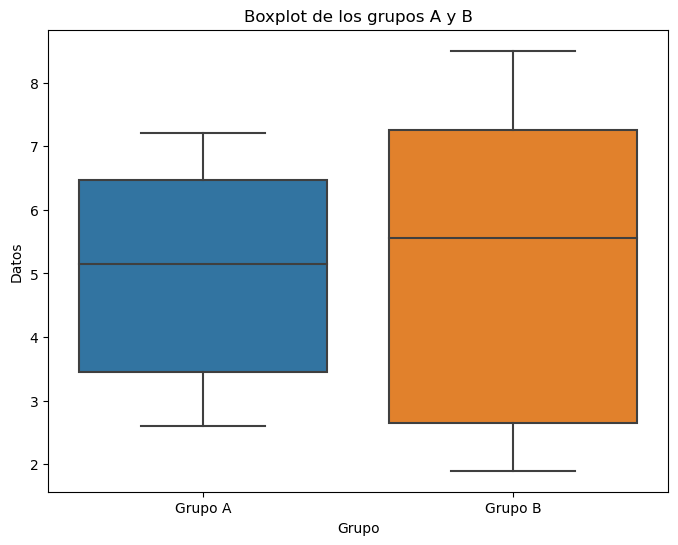

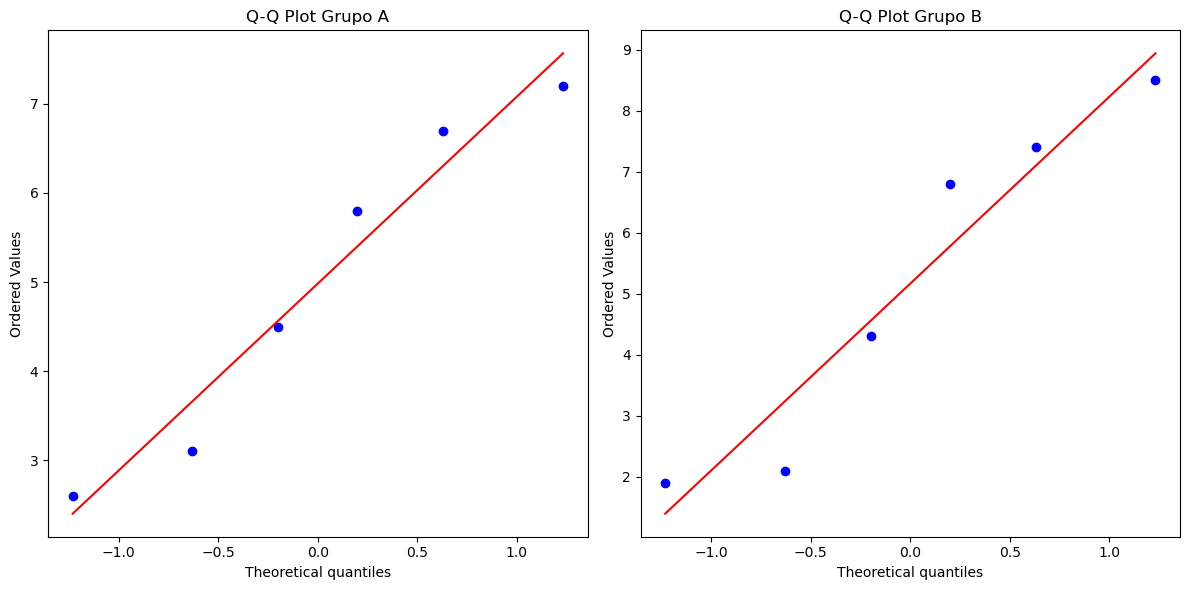

Prueba de Shapiro-Wilk para Grupo A: Estadístico = 0.9267435669898987, p-valor = 0.555199146270752
Prueba de Shapiro-Wilk para Grupo B: Estadístico = 0.8947597146034241, p-valor = 0.34388166666030884
Estadístico U de Mann-Whitney: 17.0
Valor p de Mann-Whitney: 0.9372294372294373
No rechazamos la hipótesis nula: No hay una diferencia significativa entre las medianas de los dos grupos.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Leer el archivo CSV
data = pd.read_csv('datos.csv')

print(data.head())

# Separar los datos por grupo
grupo_A = data[data['Grupo'] == 'Grupo A']['Datos']
grupo_B = data[data['Grupo'] == 'Grupo B']['Datos']

# --- a) Pruebas de normalidad ---

# 1. Gráfico de cajas (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Grupo', y='Datos', data=data)
plt.title('Boxplot de los grupos A y B')
plt.show()

# 2. Q-Q Plot
from scipy.stats import probplot

# Q-Q plot para Grupo A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(grupo_A, dist="norm", plot=plt)
plt.title('Q-Q Plot Grupo A')

# Q-Q plot para Grupo B
plt.subplot(1, 2, 2)
probplot(grupo_B, dist="norm", plot=plt)
plt.title('Q-Q Plot Grupo B')

plt.tight_layout()
plt.show()

# 3. Prueba de normalidad de Shapiro-Wilk
shapiro_A = stats.shapiro(grupo_A)
shapiro_B = stats.shapiro(grupo_B)

print(f"Prueba de Shapiro-Wilk para Grupo A: Estadístico = {shapiro_A[0]}, p-valor = {shapiro_A[1]}")
print(f"Prueba de Shapiro-Wilk para Grupo B: Estadístico = {shapiro_B[0]}, p-valor = {shapiro_B[1]}")

# --- b) Prueba no paramétrica (Mann-Whitney U) ---

# Realizar la prueba de Mann-Whitney U
u_stat, p_value_u = stats.mannwhitneyu(grupo_A, grupo_B)

print(f'Estadístico U de Mann-Whitney: {u_stat}')
print(f'Valor p de Mann-Whitney: {p_value_u}')

# Interpretación del p-valor para la prueba de Mann-Whitney
alpha = 0.05
if p_value_u < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre las medianas de los dos grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa entre las medianas de los dos grupos.")


El $p-value$ es mayor que 0.05 para ambos casos, no rechazamos la hipótesis nula, lo que indica que los datos podrían ser normales.